In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
%cd ..
import sys
sys.path.append("/Users/ahmetayrnc/Documents/04-scripts/deep_active_learning/")

/Users/ahmetayrnc/Documents/04-scripts/deep_active_learning


/Users/ahmetayrnc/Documents/04-scripts/deep_active_learning/venv/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Dataset loaded from disk


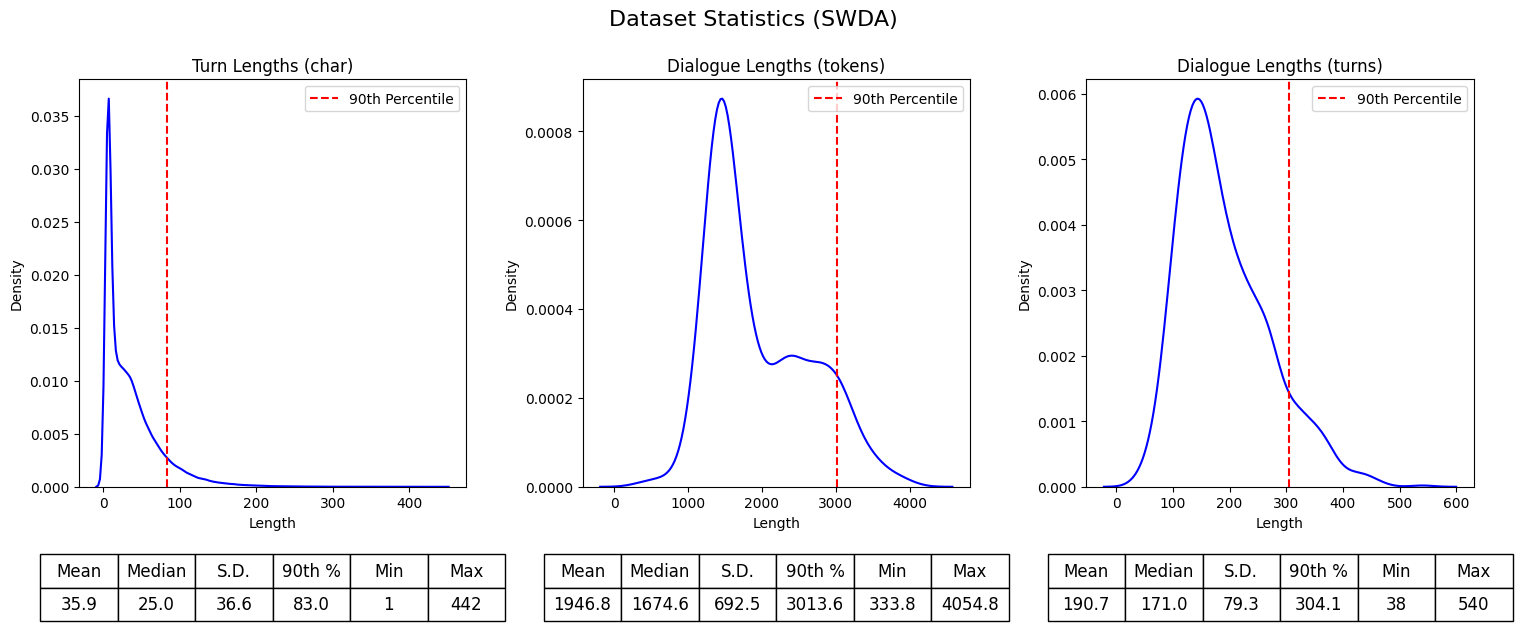

In [3]:
from data import get_DYDA, get_SWDA, get_KPN
from plot_distributions import display_dataset_statistics

train, test = get_SWDA()

display_dataset_statistics(train, 'SWDA')

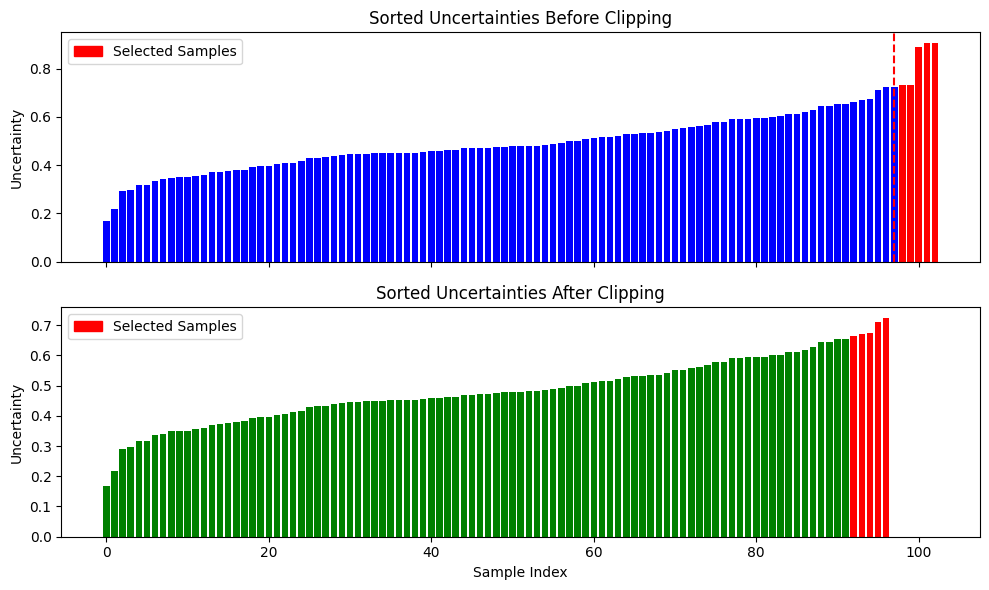

In [23]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Patch

def UC_visual_aid():

    def clip_uncertainties(uncertainties, k):
        threshold = np.percentile(uncertainties, 100 - k)
        remaining_uncertainties = np.array([u for u in uncertainties if u <= threshold])
        return remaining_uncertainties, threshold

    # Example uncertainties with a few highly uncertain samples
    uncertainties = np.random.normal(0.5, 0.1, 100)
    uncertainties = np.append(uncertainties, np.random.normal(0.9, 0.01, 3))

    # Set the clipping percentage
    k = 5

    # Clip the uncertainties
    remaining_uncertainties, threshold = clip_uncertainties(uncertainties, k)

    # Sort the uncertainties
    sorted_original = np.sort(uncertainties)
    sorted_remaining = np.sort(remaining_uncertainties)

    # Select the top 5 samples before and after clipping
    top5_original = np.sort(sorted_original)[-5:]
    top5_remaining = np.sort(sorted_remaining)[-5:]

    # Create the bar chart
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 6), sharex=True)

    # Plot original uncertainties and color selected samples red
    colors_original = ['red' if u in top5_original else 'blue' for u in sorted_original]
    ax1.bar(range(len(sorted_original)), sorted_original, color=colors_original)

    # Plot remaining uncertainties after clipping and color selected samples red
    colors_remaining = ['red' if u in top5_remaining else 'green' for u in sorted_remaining]
    ax2.bar(range(len(sorted_remaining)), sorted_remaining, color=colors_remaining)

    ax1.axvline(x=np.sum(sorted_remaining <= threshold), linestyle='--', color='red', label='Cut-off Threshold')

    # Add labels and formatting
    ax1.set_ylabel('Uncertainty')
    ax1.set_title('Sorted Uncertainties Before Clipping')

    ax2.set_ylabel('Uncertainty')
    ax2.set_title('Sorted Uncertainties After Clipping')
    ax2.set_xlabel('Sample Index')

    # Create custom legend elements
    selected_patch = Patch(color='red', label='Selected Samples')

    # Add legends to both subplots
    ax1.legend(handles=[selected_patch])
    ax2.legend(handles=[selected_patch])

    # Display the plot
    plt.tight_layout()
    plt.show()

UC_visual_aid()

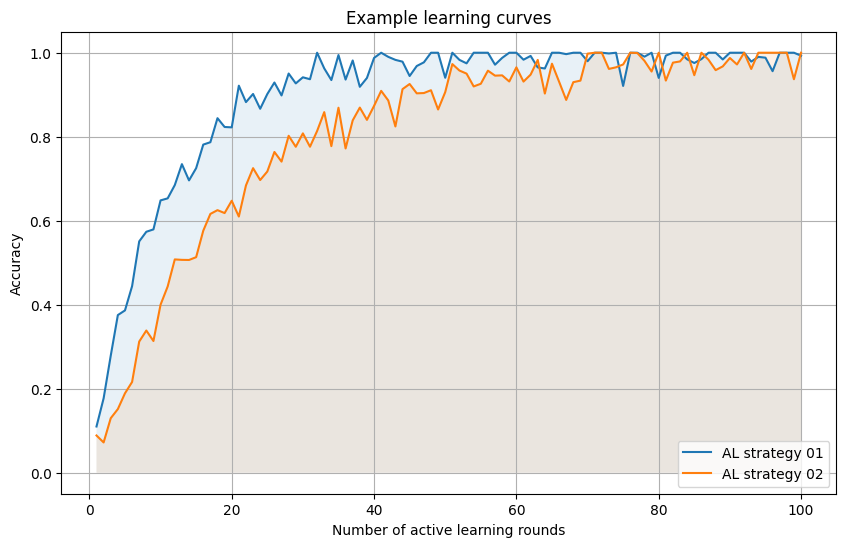

In [13]:
import numpy as np
import matplotlib.pyplot as plt

def example_learning_curve_with_noise(steepness, seed=None):
    if seed:
        np.random.seed(seed)
    x = np.arange(1, 101)
    y = 1 - np.exp(-steepness * x)
    noise = np.random.normal(0, 0.03, len(y))
    y_noisy = np.clip(y + noise, 0, 1)
    return x, y_noisy

# Generate example learning curves for two active learning strategies
x, strategy_1 = example_learning_curve_with_noise(0.1, seed=42)
_, strategy_2 = example_learning_curve_with_noise(0.05, seed=24)

plt.figure(figsize=(10, 6))

plt.plot(x, strategy_1, label='AL strategy 01')
plt.plot(x, strategy_2, label='AL strategy 02')

# Highlight the area under the curve
plt.fill_between(x, 0, strategy_1, alpha=0.1)
plt.fill_between(x, 0, strategy_2, alpha=0.1)

plt.xlabel('Number of active learning rounds')
plt.ylabel('Accuracy')
plt.title('Example learning curves')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()
